In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scripts_logic

In [2]:
data = pd.read_json("../data/cocktail_dataset.json")
data.set_index('id', inplace=True)

I will now examine the ingredients more closely. I'll start by turning them into DF

In [3]:
ingredients = scripts_logic.ingredients_df(data)

In [4]:
ingredients.head()

,name,description,alcohol,type,percentage,measure
id,,,,,,
170,Soda water,None,1,None,NaN,NaN
305,Light Rum,"Light rums, also referred to as ""silver"" or ""w...",1,Rum,NaN,2-3 oz
312,Lime,"A lime (from French lime, from Arabic līma, fr...",0,Fruit,NaN,Juice of 1
337,Mint,Lamiaceae (/ˌleɪmiˈeɪsiˌaɪ/ or /ˌleɪmiˈeɪsiiː/...,0,Flower,NaN,2-4
476,Sugar,"Sugar is the generic name for sweet-tasting, s...",0,None,NaN,2 tsp


In [5]:
ingredients.isna().sum()

name             0
description    224
alcohol          0
type           121
percentage     431
measure         35
dtype: int64

In [6]:
ingredients.shape

(531, 6)

In [7]:
ingredients.describe()

,alcohol,percentage
count,531.000000,100.000000
mean,0.467043,36.060000
std,0.499383,7.568969
min,0.000000,13.000000
25%,0.000000,37.250000
50%,0.000000,40.000000
75%,1.000000,40.000000
max,1.000000,40.000000


I am removing the description, as most of them are empty and contain only text.

In [8]:
ingredients.drop(columns=['description'], inplace=True)

In [9]:
ingredients.head()

,name,alcohol,type,percentage,measure
id,,,,,
170,Soda water,1,None,NaN,NaN
305,Light Rum,1,Rum,NaN,2-3 oz
312,Lime,0,Fruit,NaN,Juice of 1
337,Mint,0,Flower,NaN,2-4
476,Sugar,0,None,NaN,2 tsp


It is interesting to note that soda water has an alcohol status of 1, but I will not question that.

measure
1 oz             70
1/2 oz           53
1 1/2 oz         53
1                48
2 oz             44
                 ..
3/4 oz white      1
Juice of 1/4      1
1 1/2             1
1/3 oz cream      1
1/2 oz cream      1
Name: count, Length: 72, dtype: int64


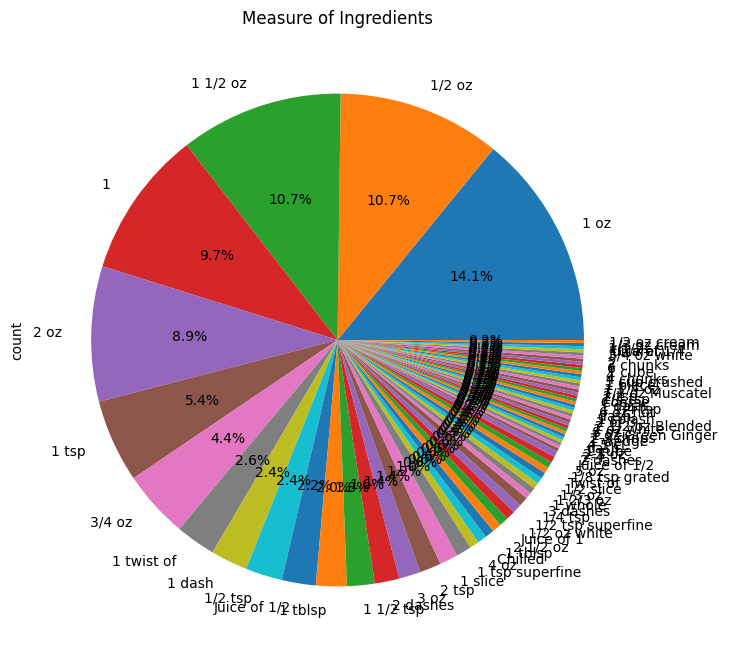

In [10]:
print(ingredients['measure'].value_counts())

plt.figure(figsize=(8,8))
ingredients['measure'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Measure of Ingredients')
plt.show()

Due to the large quantity of 72 different units of measurement, I will forgo analyzing this.

In [11]:
ingredients.drop(columns=['measure'], inplace=True)

In [12]:
ingredients.head()

,name,alcohol,type,percentage
id,,,,
170,Soda water,1,None,NaN
305,Light Rum,1,Rum,NaN
312,Lime,0,Fruit,NaN
337,Mint,0,Flower,NaN
476,Sugar,0,None,NaN


percentage
40.0    74
28.0    12
24.0     5
14.0     4
35.0     2
13.0     2
38.0     1
Name: count, dtype: int64


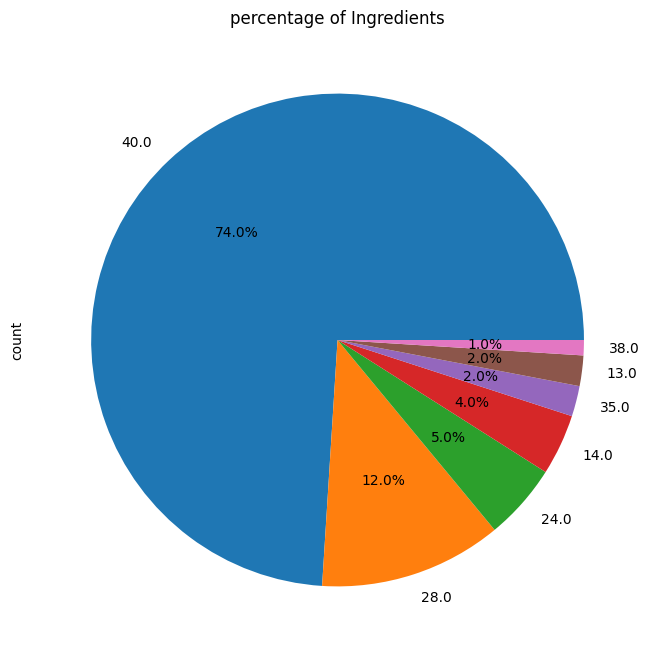

In [13]:
print(ingredients['percentage'].value_counts())

# pie chart
plt.figure(figsize=(8,8))
ingredients['percentage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('percentage of Ingredients')
plt.show()

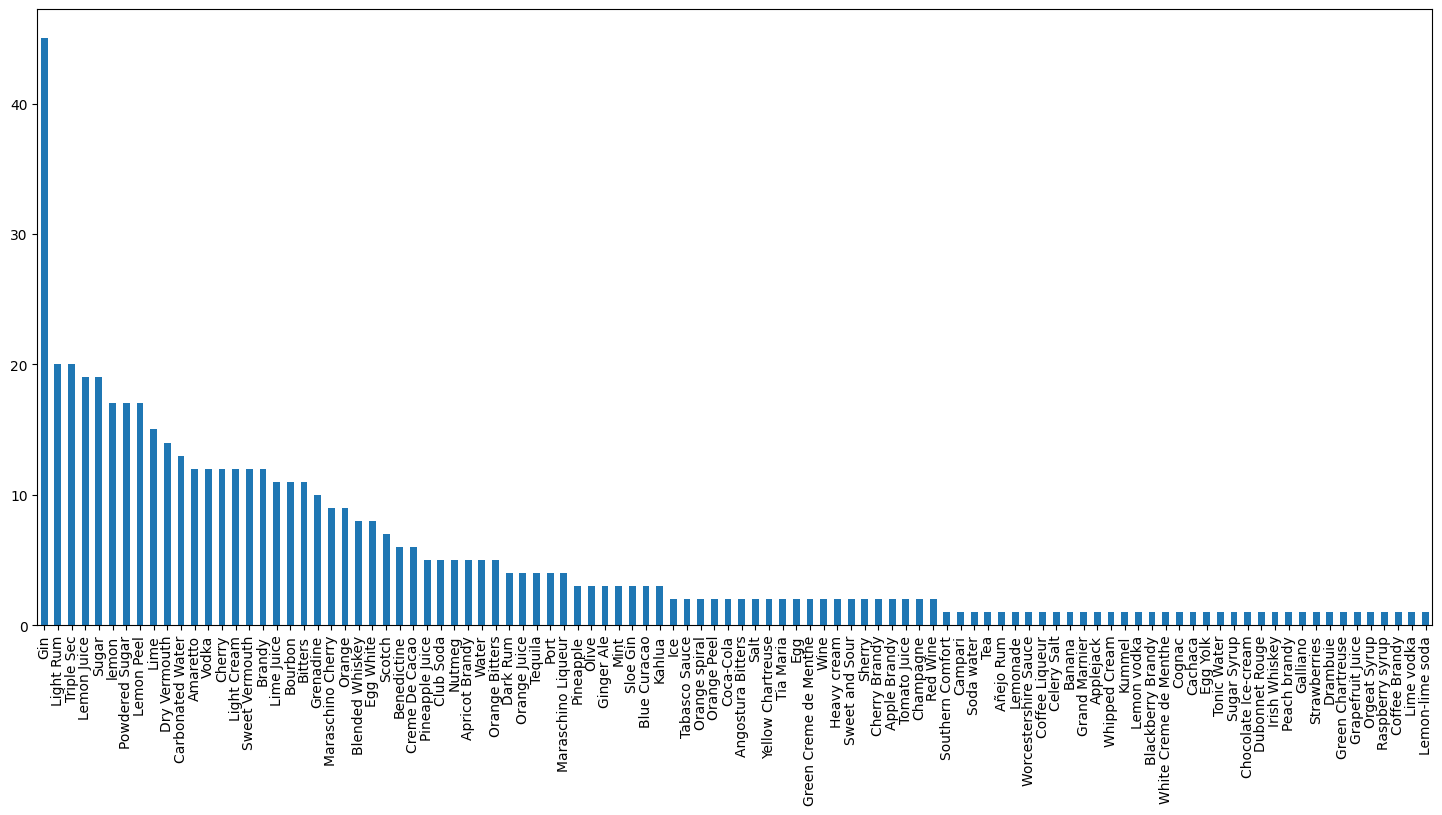

Gin                45
Light Rum          20
Triple Sec         20
Lemon Juice        19
Sugar              19
                   ..
Orgeat Syrup        1
Raspberry syrup     1
Coffee Brandy       1
Lime vodka          1
Lemon-lime soda     1
Name: count, Length: 102, dtype: int64


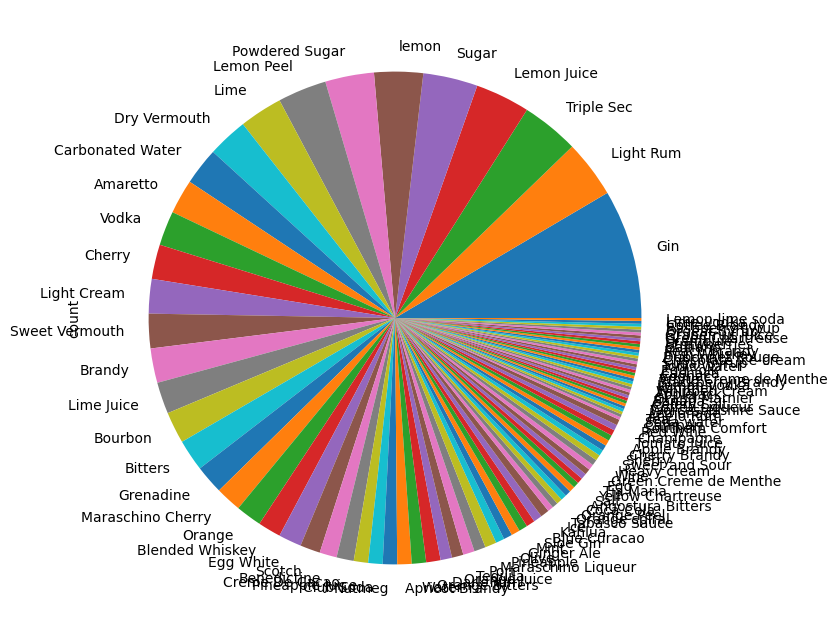

In [14]:
scripts_logic.list_to_hist_and_pie(data, "ingredients")